<a href="https://colab.research.google.com/github/Tharunopi/PyTorch/blob/main/PyTorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PyTorch workflow
1.  Turn data into tensor
2.  Build or pick a pretrained model


```
2.1. Pick a loss function and optimizer
2.2. Build a training loop
```


3.   Fit the model to the data and make prediction
4.  Evalvate the model
5.   Improve through experimentation
6.Save and reload your trained model






In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# **Creating dataset by using linear regression formula**

In [10]:
start, end, steps = 0, 1, 0.02
X = torch.arange(start, end, steps).unsqueeze(dim=1)
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [11]:
weight = 0.7
bias = 0.3
y = weight * X + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

# **Splitting the data**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(len(X_train), len(y_test))

40 10


# **Visualizing the data**

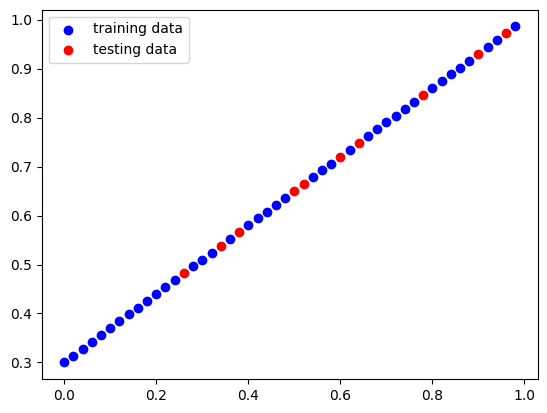

In [21]:
def visualize(train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test, prediction=None):
  plt.scatter(train_x, train_y, c='b', label='training data')
  plt.scatter(test_x, test_y, c='r', label='testing data')
  if prediction is not None:
    plt.scatter(train_y, prediction, c='g', label='prediction data')
  plt.legend()
  plt.show()

visualize()

# **Building PyTorch model**

In [22]:
#creating a linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super.__init__()
    self.weights = nn.parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # creating a forward method for computation
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

